# **IMPORTING NECESSARY LIBRARIES**

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from warnings import filterwarnings
import joblib
from google.colab import files
filterwarnings('ignore')
from sklearn.svm import SVR
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error

# **LOADING DATASET**

In [147]:
df=pd.read_csv('/content/insurance.csv')

# **DESCRIPTIVE STATISTICS**

In [148]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


🔹 Illustrative Examples

**Example 1: Young, Healthy Individual**

**Age**:22 years

**BMI**: 22 (normal)

**Smoking Status**: Non-smoker

**Profile**: Young and healthy with low risk factors.

**Expected Annual Charges**: Approximately ₹20,000 (mostly minor issues such as fever or cold).


**Example 2: Older, High-Risk Individual**

**Age**: 55 years

**BMI**: 35 (obese)

**Smoking Status**: Smoker

**Profile**: Higher risk of chronic conditions such as diabetes, heart disease, and respiratory issues.

**Expected Annual Charges**: Approximately ₹5,00,000 (covering hospital visits, treatments, and long-term care).

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [150]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# **EXPLORATORY DATA ANALYSIS (EDA)**

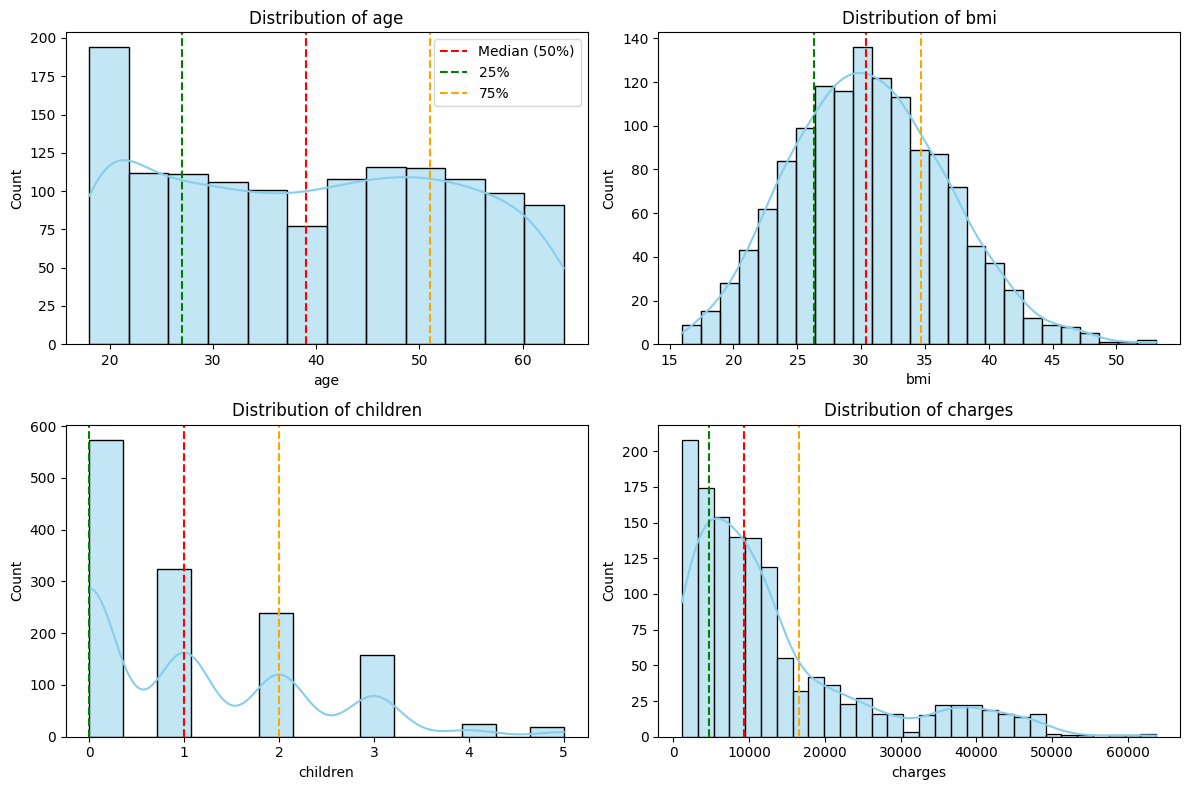

In [151]:
num_cols = ["age", "bmi", "children", "charges"]
plt.figure(figsize=(12,8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, color="skyblue")
    plt.axvline(df[col].median(), color="red", linestyle="--", label="Median (50%)")
    plt.axvline(df[col].quantile(0.25), color="green", linestyle="--", label="25%")
    plt.axvline(df[col].quantile(0.75), color="orange", linestyle="--", label="75%")
    plt.title(f"Distribution of {col}")
    if i == 1: plt.legend()
plt.tight_layout()
plt.show()

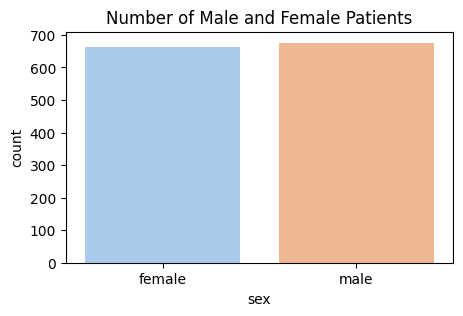

In [152]:
plt.figure(figsize=(5,3))
sns.countplot(x="sex", data=df, palette="pastel")
plt.title("Number of Male and Female Patients")
plt.show()

In [153]:
df['sex'].value_counts()

,count
sex,
male,676
female,662


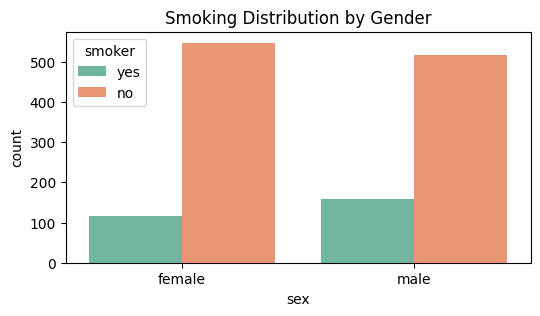

In [154]:
plt.figure(figsize=(6,3))
sns.countplot(x="sex", hue="smoker", data=df, palette="Set2")
plt.title("Smoking Distribution by Gender")
plt.show()

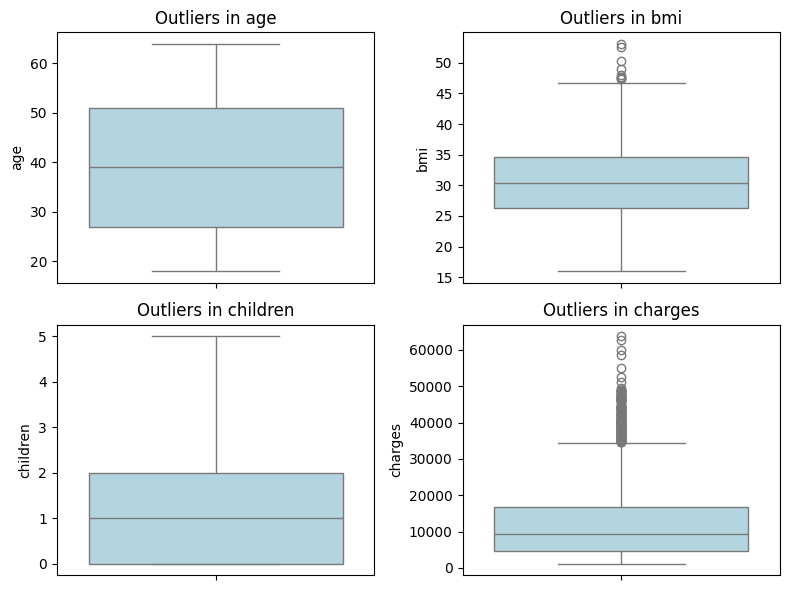

In [155]:
plt.figure(figsize=(8,6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[col], color="lightblue")
    plt.title(f"Outliers in {col}")
plt.tight_layout()
plt.show()

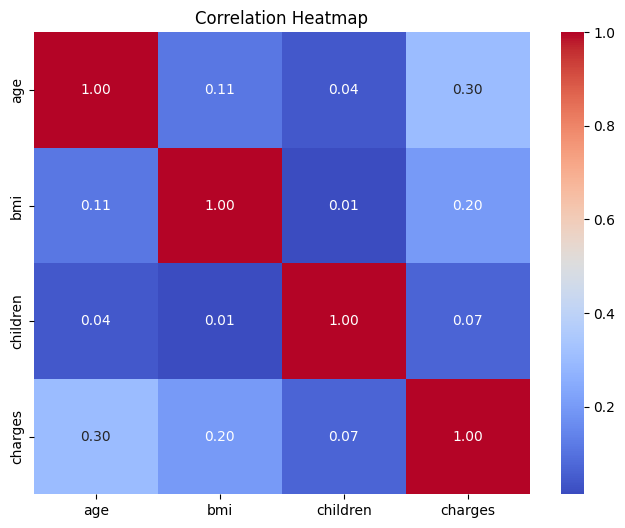

In [156]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [157]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [158]:
df['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


In [159]:
df['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


In [160]:
df['sex'].value_counts()

,count
sex,
male,676
female,662


# **DATA PREPROCESSING**

1.ENCODING

In [161]:
df["sex"] = df["sex"].map({"male": 1, "female": 0})
df["smoker"] = df["smoker"].map({"yes":1,"no":0})

In [162]:
df = pd.get_dummies(df, columns=["region"], drop_first=True)

In [163]:
df['region_northwest']=df['region_northwest'].astype(int)
df['region_southeast']=df['region_southeast'].astype(int)
df['region_southwest']=df['region_southwest'].astype(int)

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   sex               1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   int64  
 5   charges           1338 non-null   float64
 6   region_northwest  1338 non-null   int64  
 7   region_southeast  1338 non-null   int64  
 8   region_southwest  1338 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 94.2 KB


In [165]:
df.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


2.OUTLIER REMOVAL

In [166]:
num_cols = ['age', 'bmi', 'children', 'charges']
z_scores = df[num_cols].apply(zscore)
threshold = 3
mask = (np.abs(z_scores) < threshold).all(axis=1)
df_clean = df[mask].reset_index(drop=True)
print(f"Original shape: {df.shape}")
print(f"Cleaned shape: {df_clean.shape}")

Original shape: (1338, 9)
Cleaned shape: (1309, 9)


In [167]:
df_clean.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


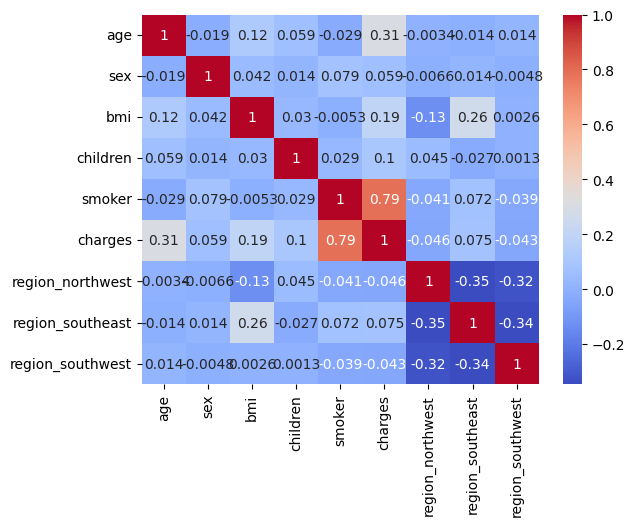

In [168]:
sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm')
plt.show()

In [169]:
df_clean.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


3.FEATURE TRANSFORMING

In [170]:
df_clean["charges_log"] = np.log1p(df_clean["charges"])
lo, hi = df_clean["bmi"].quantile([0.01, 0.99])
df_clean["bmi_w"] = df_clean["bmi"].clip(lo,hi)

In [171]:
columns_to_drop=['charges','bmi']
df_clean.drop(columns=columns_to_drop, inplace=True)

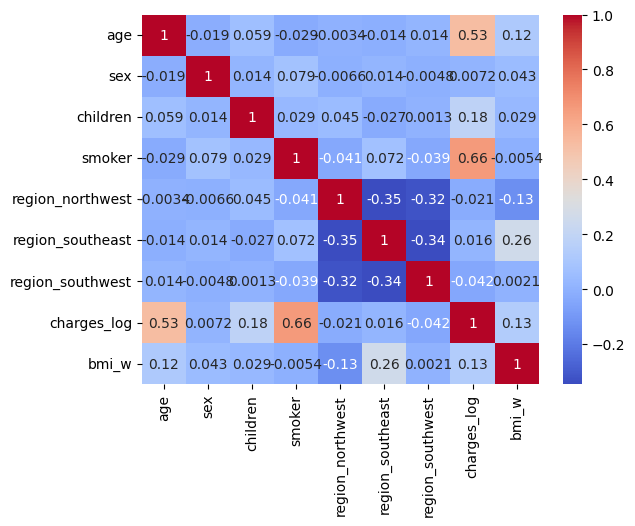

In [172]:
sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm')
plt.show()

In [173]:
df_clean.head()

,age,sex,children,smoker,region_northwest,region_southeast,region_southwest,charges_log,bmi_w
0,19,0,0,1,0,0,1,9.734236,27.900
1,18,1,1,0,0,1,0,7.453882,33.770
2,28,1,3,0,0,1,0,8.400763,33.000
3,33,1,0,0,1,0,0,9.998137,22.705
4,32,1,0,0,1,0,0,8.260455,28.880


In [174]:
columns_to_drop=['sex','region_northwest','region_southeast','region_southwest']
df_clean.drop(columns=columns_to_drop, inplace=True)

# **MODEL TRAINING**

1.LINEAR REGRESSION

In [175]:
X = df_clean[['age', 'bmi_w', 'children', 'smoker']]
y = df_clean['charges_log']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
train_r2 = r2_score(y_train, linear_model.predict(X_train))
test_r2 = r2_score(y_test, linear_model.predict(X_test))
print(f"Train R²: {train_r2:.4f}")
print(f"Test  R²: {test_r2:.4f}")
print("Coefficients:", linear_model.coef_)#WEIGHTS
print("Intercept:", linear_model.intercept_)#BIAS

Train R²: 0.7473
Test  R²: 0.8100
Coefficients: [0.48241619 0.06100543 0.11782874 0.60813331]
Intercept: 9.093273047122741


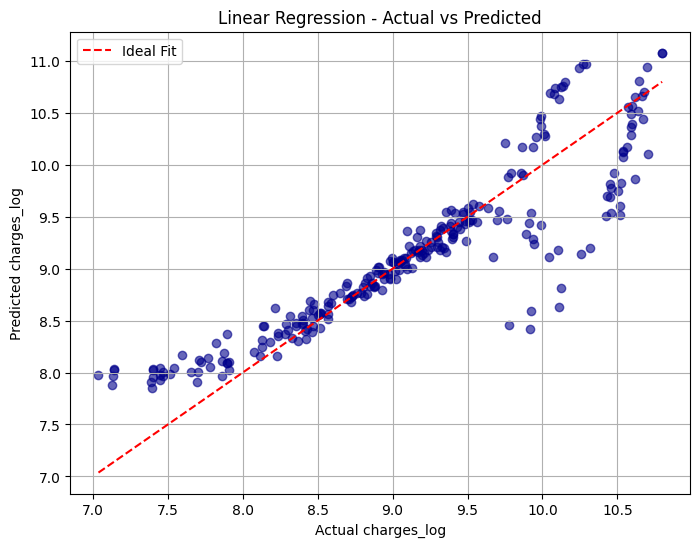

In [183]:
y_pred = linear_model.predict(X_test)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='darkblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit')
plt.xlabel('Actual charges_log')
plt.ylabel('Predicted charges_log')
plt.title('Linear Regression - Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.show()

2.POLYNOMIAL REGRESSION

In [177]:
results = []
for degree in range(1,6):
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly.fit_transform(X_scaled)
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    train_r2 = r2_score(y_train, model.predict(X_train))
    test_r2 = r2_score(y_test, model.predict(X_test))
    results.append((degree, train_r2, test_r2))
print("Degree | Train R² | Test R²")
for deg, tr, te in results:
    print(f"{deg:^6} | {tr:.4f}   | {te:.4f}")

Degree | Train R² | Test R²
  1    | 0.7473   | 0.8100
  2    | 0.8100   | 0.8929
  3    | 0.8157   | 0.8950
  4    | 0.8201   | 0.8954
  5    | 0.8258   | 0.8890


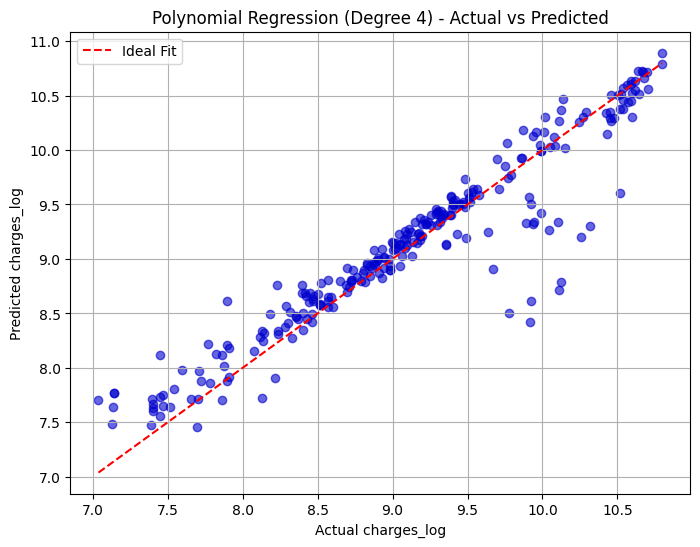

In [178]:
poly = PolynomialFeatures(degree=4, include_bias=False)
X_poly = poly.fit_transform(X_scaled)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='mediumblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit')
plt.xlabel('Actual charges_log')
plt.ylabel('Predicted charges_log')
plt.title('Polynomial Regression (Degree 4) - Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.show()

3.SUPPORT VECTOR MACHINE (REGRESSOR)

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
C_values = [10]
gamma_values = [0.1]
epsilon = 0.1
results = []
for C in C_values:
    for gamma in gamma_values:
        svr_rbf = SVR(kernel='rbf', C=C, gamma=gamma, epsilon=epsilon)
        svr_rbf.fit(X_train, y_train)

        train_r2 = r2_score(y_train, svr_rbf.predict(X_train))
        test_r2 = r2_score(y_test, svr_rbf.predict(X_test))

        results.append((C, gamma, train_r2, test_r2))
print("C     | Gamma | Train R² | Test R²")
for C, gamma, tr, te in results:
    print(f"{C:^5} | {gamma:^6} | {tr:.4f}   | {te:.4f}")

C     | Gamma | Train R² | Test R²
 10   |  0.1   | 0.8059   | 0.9030


# **SAVING AND LOADED THE MODEL**

In [180]:
final_svr_package = {
    "scaler": scaler,
    "model": svr_rbf,
    "bmi_clip": df_clean["bmi_w"].quantile([0.01, 0.99])
}
joblib.dump(final_svr_package, "svr_insurance_model.pkl")
files.download("svr_insurance_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>